<a href="https://colab.research.google.com/github/jabir-al-nahian/comment-analysis-dl/blob/main/comment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library & Package Import
I have used KERAS to implement CNN and LSTM in this dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
path ='/content/drive/MyDrive/ICNLPA/toxic/Bengali-News-Headline-Classification-main'
stopwords_list = path+'/bangla_stopwords.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Predefined Functions
I have predefined some functions for the preprocessing of my texts.The dataset contains raw text data that have many unwanted things
(Punctuations,English words,emojis etc..).I have cleaned this things with my function.

In [ ]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

# Data Import
The data is in excel file.I have about 6500+ in this dataset.The data is either positive or negative.
I have annotated "0" as Negative and "1" as Positive.

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ICNLPA/toxic/Bengali-News-Headline-Classification-main/toxic-data.csv')
display(df)

,comment,tag
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।,sever_toxic
1,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,sever_toxic
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,toxic
3,চুরি নয় লুটপাট।,toxic
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,normal
...,...,...
13797,ভালভাবে নির্বাচন দেন।,normal
13798,বঙ্গবন্ধুর খুনীদের পারবেন না? এই মূহূর্তে অবশ্...,normal
13799,আইনকে তার নিজস্ব গতিতে চলতে দেওয়া হোক।,normal
13800,দেশের প্রশাসন normal না। এমতাবস্থায় তারেক জিয়া...,normal


Now we will visualize the ratio of Postive and Negative sentiment.We can see that the ratio is closly 1:1.Which is considered as a good balance.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


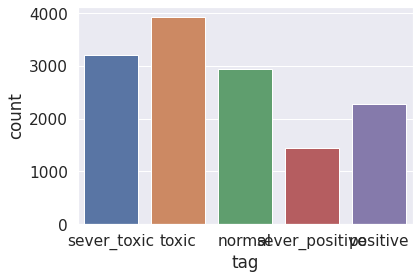

In [ ]:
sns.countplot(df['tag']);

# Data Preprocessing
At first we will clean the dataset with my predefined function preprocessing().

In [ ]:
df['comment'] = df.comment.apply(lambda x: preprocessing(str(x)))

In [ ]:
df.reset_index(drop=True, inplace=True)

Now I will prepare the dataset to train in the CNN LSTM network.So i have to convert all Sentences into a numpy Array.

I have divided the training and testing data into 80/20 ratio.

I have converted the sentiment values into one hot encodings for the convenient use in model training.


In [ ]:
print(df.comment[75])

বারবার দরকার শেখ হাসিনা সরকার


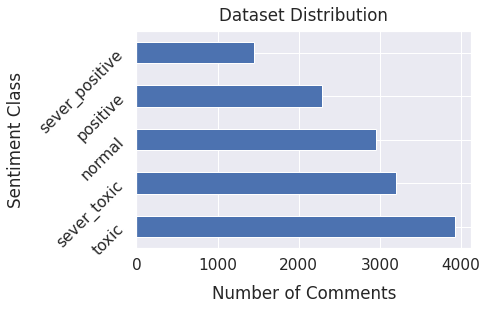

In [ ]:
sns.set(font_scale=1.4)
df['tag'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [ ]:
# print some unprocessed reviews
sample_df = [10,100,75,150,200,220,330,400,550]
for i in sample_df:
      print(df.comment[i],'\n','Sentiment:-- ',df.tag[i],'\n')

এরা যেখানেই যাবে সেখানেই চুরি হবে 
 Sentiment:--  toxic 

নিক্কেই এশিয়ান রিভিউবাংলাদেশের উত্থানের পেছনে শেখ হাসিনা 
 Sentiment:--  positive 

বারবার দরকার শেখ হাসিনা সরকার 
 Sentiment:--  positive 

সার্বিক বিবেচনায় পোশাক শ্রমিকদের বেতন বাড়ানো উচিত বর্তমান বাজার মূল্য বিবেচনা করলে সর্ব নিম্ন বেতন হওয়া দরকার  টাকা যেথানে এখন শ্রমিকরা বেতন পাচ্ছেন  টাকা 
 Sentiment:--  toxic 

জনগন চাই গ্রামীন এসএমসি করুক 
 Sentiment:--  positive 

বাচ্চু কি মুহিত মাল সাহেবের থেকেও ক্ষমতাধর এর খমতার উৎস কে তা জাতিকে জানতে হবে এবং জানা জরুরি বাংলাদেশ নামক দেশটির বাচার জন্য 
 Sentiment:--  sever_toxic 

এই সংবাদ পড়ার পর ব্যংকে টাকা আছে এমন লোকেরা নিশ্চিত আতংকে থাকবেন 
 Sentiment:--  normal 

উনারা সমালোচনা করেন বলেই বাজেটে যা একটু জনস্বার্থ প্রতিফলিত হয় অন্যথায় যাচ্ছে তাই হতো  
 Sentiment:--  normal 

যারা না জেনে না বুঝেই অযথা খারাপ মন্তব্য করছেন তাদের উচিত উপরের রিপরটটা পড়ে মাফ চাওয়া  যে শিলপ দেশকে বাচিয়ে রাখে তার বিরুদ্দে লেখা মানেই দেশের বিরুদ্দে লেখা  
 Sentiment:--  sever_positive 



In [ ]:
# Length of each Reveiws
df['length'] = df['comment'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = df.loc[df.length>2]
dataset = df.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(df)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 0 Small Reviews 
Total Reviews: 13802


In [ ]:
df

,comment,tag,length
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন,sever_toxic,7
1,এটা কেন হচ্ছে সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে ন...,sever_toxic,14
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,toxic,11
3,চুরি নয় লুটপাট,toxic,3
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,normal,15
...,...,...,...
13797,ভালভাবে নির্বাচন দেন,normal,3
13798,বঙ্গবন্ধুর খুনীদের পারবেন না এই মূহূর্তে অবশ্য...,normal,32
13799,আইনকে তার নিজস্ব গতিতে চলতে দেওয়া হোক,normal,7
13800,দেশের প্রশাসন না এমতাবস্থায় তারেক জিয়া দেশে এ...,normal,16


In [ ]:
df

,comment,tag,length
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন,sever_toxic,7
1,এটা কেন হচ্ছে সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে ন...,sever_toxic,14
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,toxic,11
3,চুরি নয় লুটপাট,toxic,3
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,normal,15
...,...,...,...
13797,ভালভাবে নির্বাচন দেন,normal,3
13798,বঙ্গবন্ধুর খুনীদের পারবেন না এই মূহূর্তে অবশ্য...,normal,32
13799,আইনকে তার নিজস্ব গতিতে চলতে দেওয়া হোক,normal,7
13800,দেশের প্রশাসন না এমতাবস্থায় তারেক জিয়া দেশে এ...,normal,16


In [ ]:
contractions = {
"বি.দ্র ": "বিশেষ দ্রষ্টব্য",
"ড.": "ডক্টর",
"ডা.": "ডাক্তার",
"ইঞ্জি:": "ইঞ্জিনিয়ার",
"রেজি:": "রেজিস্ট্রেশন",
"মি.": "মিস্টার",
"মু.": "মুহাম্মদ",
"মো.": "মোহাম্মদ",
}

In [ ]:
import string
import re
def clean_text(text,remove_stopwords = False):
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    # Format words and remove unwanted characters
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_digits = u"[\u09E6\u09E7\u09E8\u09E9\u09EA\u09EB\u09EC\u09ED\u09EE\u09EF]+"
    english_chars = u"[a-zA-Z0-9]"
    punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,€¦!?½£¶™¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    bangla_fullstop = u"\u0964"     #bangla fullstop(dari)

    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"

    text = re.sub(bangla_digits, " ", text)
    text = re.sub(punc, " ", text)
    text = re.sub(english_chars, " ", text)
    text = re.sub(bangla_fullstop, " ", text)
    text = re.sub(punctSeq, " ", text)
    text = whitespace.sub(" ", text).strip()

    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;‘:‘ ’', '', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]। ,', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r"[\@$#%~+-\.\'।\"]"," ",text)
    text = re.sub(r"(?m)^\s+", "", text)
    text = re.sub("[()]","",text)
    text = re.sub("[‘’]","",text)
    text = re.sub("[!]","",text)
    text = re.sub("[/]","",text)
    text = re.sub("[:]","",text)
    text= re.sub('\ |\?|\.|\!|\/|\;|\:', ' ',text)
    text= text.strip("/")

    if remove_stopwords:
        k = []
        with open('/content/drive/MyDrive/ICNLPA/toxic/Bengali-News-Headline-Classification-main/bangla_stopwords.txt', 'r',encoding="utf-8") as f:
            for word in f:
                word = word.split()
                k.append(word[0])
            text = [t for t in text if t not in k]
            text = "".join(text)

    return text

In [ ]:
df

,comment,tag,length
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন,sever_toxic,7
1,এটা কেন হচ্ছে সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে ন...,sever_toxic,14
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,toxic,11
3,চুরি নয় লুটপাট,toxic,3
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,normal,15
...,...,...,...
13797,ভালভাবে নির্বাচন দেন,normal,3
13798,বঙ্গবন্ধুর খুনীদের পারবেন না এই মূহূর্তে অবশ্য...,normal,32
13799,আইনকে তার নিজস্ব গতিতে চলতে দেওয়া হোক,normal,7
13800,দেশের প্রশাসন না এমতাবস্থায় তারেক জিয়া দেশে এ...,normal,16


In [ ]:
clean_type = []
for newstype in df.tag:
    clean_type.append(clean_text(newstype,remove_stopwords=True))

clean_texts = []
for text in df.comment:
    clean_texts.append(clean_text(text))

In [ ]:
import itertools
import os
import numpy as np # linear algebra
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
import keras.utils as ku
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from keras.layers import Dropout
from keras import optimizers

from numpy.random import seed

seed(1)

layers = keras.layers
models = keras.models

In [ ]:
df['tag'].value_counts()

toxic             3928
sever_toxic       3198
normal            2951
positive          2280
sever_positive    1445
Name: tag, dtype: int64

In [ ]:
train_size = int(len(df) * .80)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 11041
Test size: 2761


In [ ]:
def train_test_split(df, train_size):
    train = df[:train_size]
    test = df[train_size:]
    return train, test

In [ ]:
train_cat, test_cat = train_test_split(df['tag'], train_size,)
train_text, test_text = train_test_split(df['comment'], train_size,)

In [ ]:
max_words = 5000
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words,
                                              char_level=False)

In [ ]:
tokenize.fit_on_texts(train_text)
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

In [ ]:
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (11041, 5000)
x_test shape: (2761, 5000)
y_train shape: (11041, 5)
y_test shape: (2761, 5)


In [ ]:
batch_size = 16
epochs = 80
adam=keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [ ]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16,kernel_initializer='uniform',input_shape=(max_words,)))
model.add(layers.Dropout(0.2))
model.add(layers.Activation('relu'))
model.add(layers.Dense(num_classes))
model.add(layers.Dropout(0.2))
model.add(layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
model.summary()

NameError: ignored

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.2)

Epoch 1/80
552/552 - 2s - loss: 1.5623 - accuracy: 0.2870 - val_loss: 1.5851 - val_accuracy: 0.2598 - 2s/epoch - 4ms/step
Epoch 2/80
552/552 - 1s - loss: 1.4771 - accuracy: 0.3636 - val_loss: 1.5724 - val_accuracy: 0.2752 - 1s/epoch - 2ms/step
Epoch 3/80
552/552 - 2s - loss: 1.3923 - accuracy: 0.4084 - val_loss: 1.5661 - val_accuracy: 0.2884 - 2s/epoch - 4ms/step
Epoch 4/80
552/552 - 2s - loss: 1.3086 - accuracy: 0.4569 - val_loss: 1.5740 - val_accuracy: 0.2807 - 2s/epoch - 3ms/step
Epoch 5/80
552/552 - 1s - loss: 1.2396 - accuracy: 0.4933 - val_loss: 1.5818 - val_accuracy: 0.2893 - 1s/epoch - 2ms/step
Epoch 6/80
552/552 - 1s - loss: 1.1643 - accuracy: 0.5303 - val_loss: 1.6034 - val_accuracy: 0.2807 - 1s/epoch - 2ms/step
Epoch 7/80
552/552 - 1s - loss: 1.0919 - accuracy: 0.5671 - val_loss: 1.6280 - val_accuracy: 0.2902 - 1s/epoch - 2ms/step
Epoch 8/80
552/552 - 1s - loss: 1.0299 - accuracy: 0.5925 - val_loss: 1.6590 - val_accuracy: 0.2893 - 1s/epoch - 2ms/step
Epoch 9/80
552/552 - 1s 

In [ ]:
score = model.evaluate(x_train, y_train,
                       batch_size=batch_size, verbose=2)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

691/691 - 1s - loss: 1.2436 - accuracy: 0.8323 - 853ms/epoch - 1ms/step
Train loss: 1.243604063987732
Train accuracy: 0.8322615623474121


In [ ]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

173/173 - 0s - loss: 5.3921 - accuracy: 0.2709 - 219ms/epoch - 1ms/step
Test loss: 5.392055034637451
Test accuracy: 0.2709163427352905


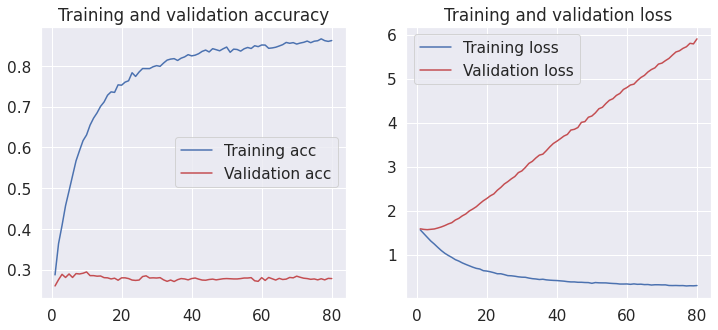

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

In [ ]:
text_labels = encoder.classes_
for i in range(20):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_text.iloc[i][:50], "...")
    print('Actual Type:' + test_cat.iloc[i])
    print("Predicted Type: " + predicted_label + "\n")

মেহেদী মারুফ ছেলেটা অসাধারণ প্রতিভাধর একজন মারকুটে ...
Actual Type:normal
Predicted Type: positive

মোহামেডানের লজ্জা হওয়া উচিত আর বাংলাদেশ ক্রিকেট বো ...
Actual Type:toxic
Predicted Type: sever_toxic

এই অয়ালশ আসার আগে হিথ স্ত্রিকের সময় চারজন পেসার নি ...
Actual Type:normal
Predicted Type: toxic

বাংলাদেশের কেউ এমন কথা বললে তার নাগরিকত্ব বাতিল কর ...
Actual Type:toxic
Predicted Type: toxic

দারুন মন্তব্যটি নাম প্রকাশ করে করলেই পারতেন ...
Actual Type:sever_positive
Predicted Type: toxic

শিরনাম ভাল লাগল না তিনি ক্যারিবিয় দলের পরাজয় খুশি  ...
Actual Type:sever_positive
Predicted Type: positive

আমি বাংলাদেশ দলের কোচ ওয়ালশ এর উদ্দেশ্য বলছি মোঃ খ ...
Actual Type:normal
Predicted Type: positive

মিস ইউ লিও লাভ ইউ এ লট ...
Actual Type:sever_positive
Predicted Type: toxic

বাহ বাপব্যাটাকে একসাথে দেখে খুব ভাল লাগল ...
Actual Type:sever_toxic
Predicted Type: sever_toxic

অন্য রা বললে গুরতর অপরাধ  ভারত করলে এটা কোন দোষের  ...
Actual Type:toxic
Predicted Type: normal

ভাষায় প্রকাশের অযোগ্য এটা দ

In [ ]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [ ]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='/content/drive/MyDrive/ICNLPA/toxic/Bengali-News-Headline-Classification-main/kalpurush.ttf')
fontproperties=prop
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=25, fontproperties=prop)
    plt.yticks(tick_marks, classes, fontsize=25, fontproperties=prop)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

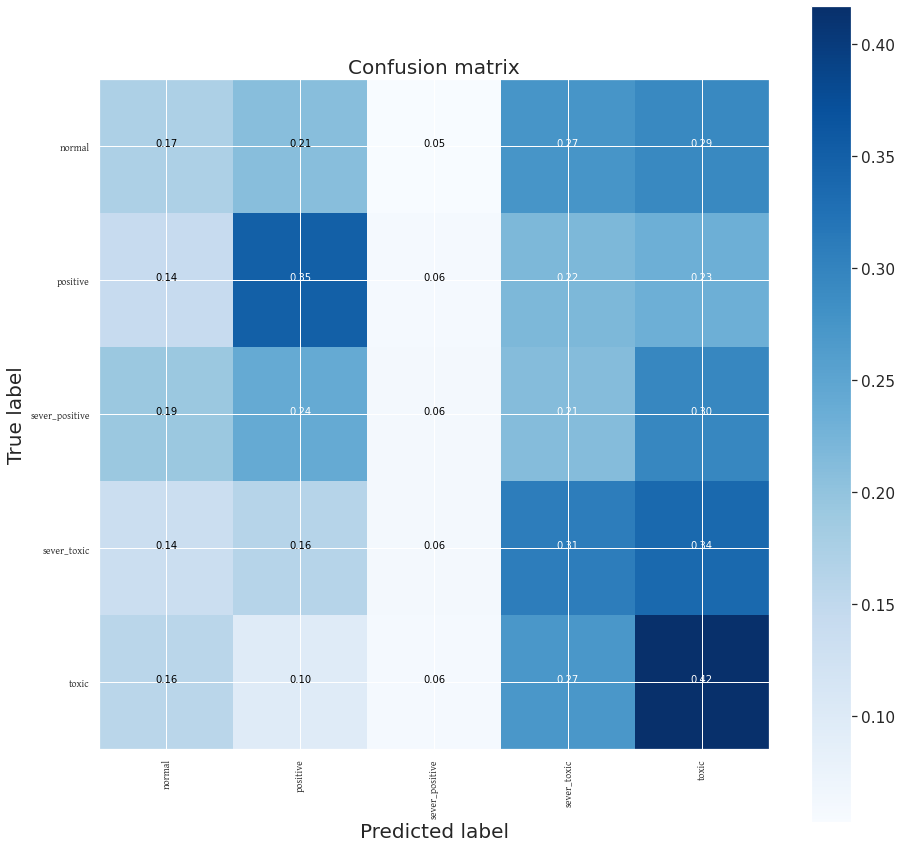

In [ ]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()